# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

\begin{equation}
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
\end{equation}

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

\begin{equation}
F = c(1 + h_1 + h_2 + l + d)
\end{equation}

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate des Federpakets.
   - b. Die Federn $c_2$ liegt innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

## Einleitung


## Analyse
### Setup

Zuerst werden die notwendigen Libraries geladen

In [107]:
# Numpy for higher level mathematics
import numpy as np
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Plot the graphs in the notebook
%matplotlib inline
import math

### 1a) Simulation von N=10^4 stochastisch unabhängigen Einzelfedern, bestimmung der Federrate des Paketes

Die Federn 1 bis 3 werden in ihren Toleranzbereichen mit einer Gleichmäßigen Verteilung simuliert.
Für die Federrate ergibt sich eine Normalverteilung mit einem Erwartungswert von etwa 3600 N/mm (Entspricht der Nominalen Federrate des Paketes) 
Die Standard Abweichung liegt bei etwa 87 N/mm (Genaue Werte für die jeweiligen experimente sind im Folgenden Abschnitt zu finden. 

𝑐1=(100±20)N/mm 
𝑐2=(150±30)N/mm 
𝑐3=(200±40)N/mm


 Erwartungswert 3599.7935815922574 N/mm 
 Varianz 7674.580311444738 (N/mm)^2 
 => Standard Deviation 87.6046820178279 N/mm


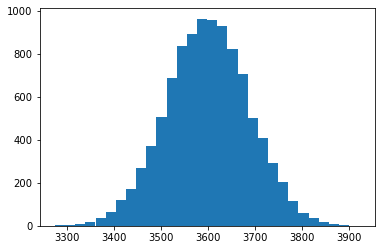

In [108]:
N = 10000
# Random number generator
rng = np.random.default_rng()

c1 = rng.uniform(low = 80, high = 120, size = (N,8))
c2 = rng.uniform(low = 120, high = 180, size = (N,8))
c3a = rng.uniform(low = 160, high = 240, size = (N,8))
c = np.sum(c1, axis = 1)+np.sum(c2, axis = 1)+np.sum(c3a, axis = 1)

plt.hist(c, bins = 30)

avg_c=np.mean(c)
var_c=np.var(c)
std_c=np.std(c)

print(' Erwartungswert', avg_c, 'N/mm \n Varianz', var_c, '(N/mm)^2 \n => Standard Deviation', std_c,'N/mm')


### 1b) c2=200-40N/mm

Die Einschränkung des Toleranzbereichs auf Werte unter 200N/mm für die dritte Feder führt zu einer verringerung des Erwartungswertes um etwa 160 N/mm (um 8x20N/mm) und einer Verringerung der Standardvariation um etwa 20 N/mm was genau der Halbierung des Toleranzfensters (1/2x40N/mm) entspricht. 

 Erwartungswert 3439.561976228506 N/mm ( 160.23160536375144 )  
 Varianz 4525.4800728517985 (N/mm)^2 
 => Standard Deviation 67.27168849413398 N/mm ( 20.332993523693915 )


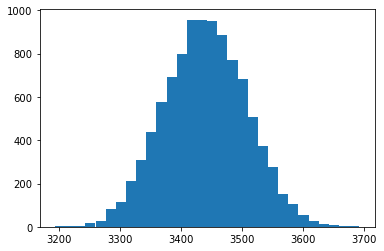

In [109]:
c3b = rng.uniform(low = 160, high = 200, size = (N,8))
cb = np.sum(c1, axis = 1)+np.sum(c2, axis = 1)+np.sum(c3b, axis = 1)

plt.hist(cb, bins = 30)

avg_cb=np.mean(cb)
var_cb=np.var(cb)
std_cb=np.std(cb)

print(' Erwartungswert',avg_cb,'N/mm (',avg_c-avg_cb,')  \n Varianz', var_cb, '(N/mm)^2 \n => Standard Deviation', std_cb,'N/mm (',std_c-std_cb,')')



### 2 𝐹=𝑐(1+ℎ1+ℎ2+𝑙+𝑑)
Die geometrischen Eigenschaften entspricht dem ersten Assignment:

Deviation  𝑑 /mm: Gleichverteilt,  [−0.05,0.05]mm 
Deviation  ℎ1 /mm: Gleichverteilt,  [−0.05,0.05]mm 
Deviation  ℎ2 /mm: Gleichverteilt,  [−0.05,0.05]mm 
Dev.  𝑙 /mm: Gleichverteilt,  [−0.05,0.05]mm

 Erwartungswert 18719.147051425196 N 
 Varianz 9481506.729156677 N^2 
 => Standard Deviation 3079.2055353867945 N


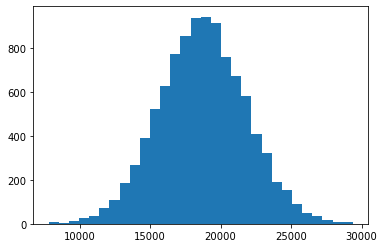

In [118]:
d = rng.uniform(low = -0.05, high =0.05, size = (N,8))
h1 = rng.uniform(low = -0.05, high =0.05, size = (N,8))
h2 = rng.uniform(low = -0.05, high =0.05, size = (N,8))
l= rng.uniform(low = -0.05, high =0.05, size = (N,8))
i=2.6
F=c*2*i*(1+np.sum(d, axis = 1)+np.sum(h1, axis = 1)+np.sum(h2, axis = 1)+np.sum(l, axis = 1))

plt.hist(F, bins = 30)

avg_F=np.mean(F)
var_F=np.var(F)
std_F=np.std(F)
print(' Erwartungswert', avg_F, 'N \n Varianz', var_F, 'N^2 \n => Standard Deviation', std_F,'N')
                         
    